In [1]:
import numpy as np 
import pandas as pd 
from scipy.stats import norm
import seaborn as sns 

In [8]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/035/126/original/weight-height.csv?1684995383')
df.shape

(10000, 3)

In [9]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [10]:
df_height = df['Height']
df_height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

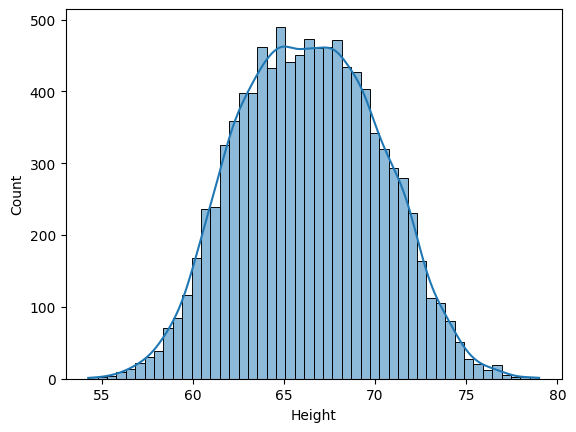

In [29]:
sns.histplot(df_height,kde=True)

In [11]:
df_height.sample(5)

3182    70.280272
2147    69.533596
6288    69.640382
9243    60.989217
8145    66.835032
Name: Height, dtype: float64

In [21]:
np.mean(df_height.sample(5))

69.68483911553906

<Axes: xlabel='Height', ylabel='Count'>

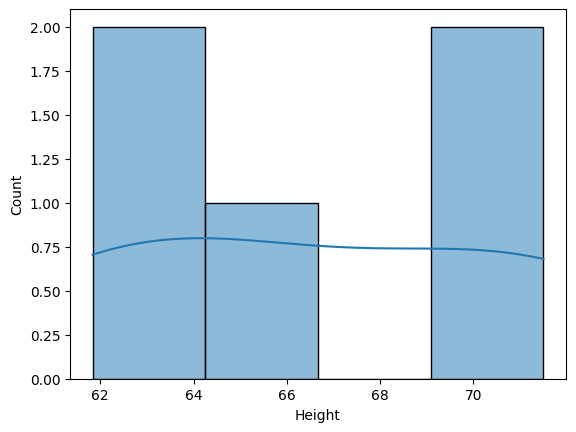

In [30]:
sns.histplot(df_height.sample(5),kde=True)

In [26]:
df_5_sample = [np.mean(df_height.sample(5)) for i in range(1000)]

In [28]:
df_5_sample[:5]

[67.25893591689076,
 66.20353506531104,
 69.51285479031934,
 64.94650473598146,
 63.966914313022855]

<Axes: ylabel='Count'>

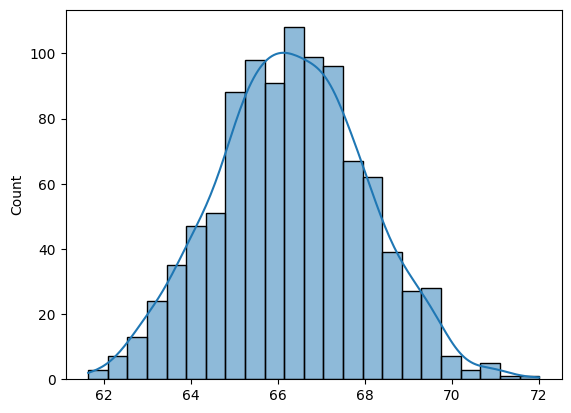

In [31]:
sns.histplot(df_5_sample,kde=True)

<Axes: ylabel='Count'>

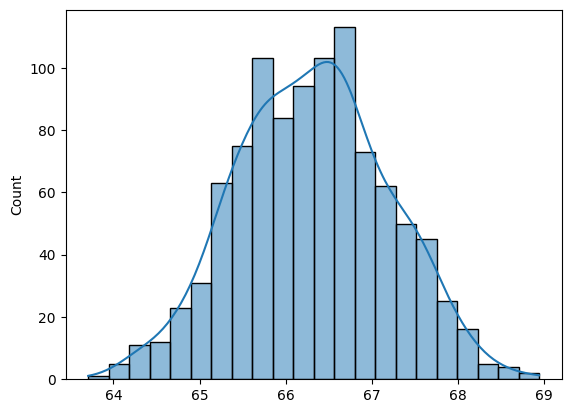

In [32]:
# Increasing the sample size to 20
df_20_sample = [np.mean(df_height.sample(20)) for i in range(1000)]
sns.histplot(df_20_sample,kde=True)

In [35]:
mu = df_height.mean()
sigma = df_height.std()
print('Mu : ', mu)
print('Sigma : ', sigma)
print('Five sample mean : ',np.mean(df_5_sample))
print('Five sample std dev : ', np.std(df_5_sample))
print('Twenty sample mean : ',np.mean(df_20_sample))
print('Twenty sample std dev : ', np.std(df_20_sample))

Mu :  66.36755975482124
Sigma :  3.8475281207732293
Five sample mean :  66.31579234275085
Five sample std dev :  1.6975145843333883
Twenty sample mean :  66.30998464528503
Twenty sample std dev :  0.8797042737518673


In [41]:
# Systolic blood pressure of a group of people is known to have an average of 122 mmHg
# and a standard deviation of 10 mmHg.
# Calculate the probability that the average blood pressure of 16 people will be greater than 125 mmHg.

mu = 122
sigma = 10 
n =  16 
x = 125 
z = (x - mu) / sigma
# Here we dont have the sigma instead of that we are using se standard error. i.e., (sigma / sqrt(n))
print('Standard Error : ',sigma/np.sqrt(16))
se = sigma/np.sqrt(16)
z = (x - mu) / (se)
print('z:',z)


Standard Error :  2.5
z: 1.2


In [42]:
1-norm.cdf(z)

0.11506967022170822

In [43]:
# Weekly toothpaste sales have a mean 1000 and std dev 200. Sample is taken of size 4.
# What is the probability that the average weekly sales next month is more than 1110?
# Click on an option to submit your answer
# A
# 0.29
# B
# 0.13
# C
# 0.11
# D
# 0.08

mu = 1000 
sigma = 200 
n = 4 
x = 1110

se = sigma / np.sqrt(n)
print('se:',se)
z = (x - mu )/se
print('z:',z)
print('Probability : ', 1-norm.cdf(z))


se: 100.0
z: 1.1
Probability :  0.13566606094638267


In [4]:
# In an e-commerce website, the average purchase amount per customer is $80 with a standard deviation of $15.
# If we randomly select a sample of 50 customers,
# what is the probability that the average purchase amount in the sample will be less than $75?

mu = 80 
sigma = 15 
n = 50 
x = 75
se = sigma / np.sqrt(n)
print('se:',se)
z = (x - mu )/se
print('z:',z)
print('Probability : ', norm.cdf(z))


se: 2.1213203435596424
z: -2.3570226039551585
Probability :  0.0092110627270495


In [2]:
# From a sample of 80 endangered birds,
# the average wingspan was found to be 45 cm, with a population standard deviation of 10 cm.
# What is the correct confidence interval of the mean wingspan of the entire population with 90% confidence.

n = 80
mu = 45 
sigma = 10 
ci = 0.90

z_min = norm.ppf(0.05)
z_max = norm.ppf(1-0.05)
print(f'z-min : {z_min}, z-max : {z_max}')

z-min : -1.6448536269514729, z-max : 1.6448536269514722


In [4]:
# z = x - mu / sigma 
# we have z, x and sigma 
# x = (z * sigma) + mu
se = (sigma/np.sqrt(n))
x1 = z_min * se + mu
x2 = z_max * se + mu
print(f'{x1} < mu < {x2}')

43.16099773854971 < mu < 46.83900226145029


## Do the same above by using python code
### Computing the confidence interval

In [5]:
norm.interval(confidence=0.90,loc=mu,scale = se)

(43.16099773854971, 46.83900226145029)

In [6]:
# In a software project, the team estimates bug resolution time at an average of 6 hours
# with a standard deviation of 2 hours.
# To estimate the mean resolution time with 99% confidence, the project manager samples 25 resolved bugs.
# What is the correct confidence interval?

mu = 6
sigma = 2
confidence = 0.99
n = 25 
se = sigma / np.sqrt(n)

norm.interval(confidence=confidence, loc = mu, scale = se)

(4.96966827858044, 7.03033172141956)

In [8]:
z_min = norm.ppf(0.005)
z_max = norm.ppf(1-0.005)
x1 = z_min * se + mu
x2 = z_max * se + mu
print(f'{x1} < mu < {x2}')

4.969668278580439 < mu < 7.03033172141956


In [19]:
def clt_ci(mu, sigma, n, confidence_level):
    std_err = sigma / np.sqrt(n)
    print(f'Std_Err:{std_err}')
    slice = (1 - (confidence_level/100))/2
    print(f"slice:{slice}")
    z_min = norm.ppf(slice)
    z_max = norm.ppf(1-slice)
    print(f"z_min : {z_min}, z_max : {z_max}")
    x1 = z_min * std_err + mu 
    x2 = z_max * std_err + mu 
    print(x1,x2)
clt_ci(6, 2, 25, 99)

Std_Err:0.4
slice:0.0050000000000000044
z_min : -2.5758293035489004, z_max : 2.5758293035489004
4.96966827858044 7.03033172141956


# Bootstrapping
We are using bootstrapping to create more number of samples with the help of less number of samples that we have

In [13]:
survey_1 = [31,34,35,37,38,33]
n = 6
bootstrapped_samples = np.random.choice(survey_1, size=n)
bootstrapped_samples

array([38, 31, 34, 31, 35, 31])

In [9]:
survey_1 = [31,34,35,37,38,33]
survey_bootstrapped = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(survey_1, size=6)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    survey_bootstrapped.append(bootstrapped_mean)



<Axes: ylabel='Count'>

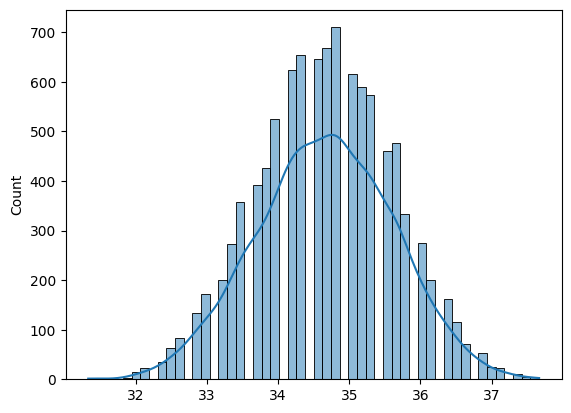

In [12]:
sns.histplot(survey_bootstrapped,kde=True)

In [15]:
x1 = np.percentile(survey_bootstrapped, 2.5)
x1

32.833333333333336

In [16]:
x2 = np.percentile(survey_bootstrapped, 97.5)
x2

36.5

In [17]:
(x1,x2)

(32.833333333333336, 36.5)